In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM,GRU,SimpleRNN
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('airline-passengers.csv')
df.head()
df.drop(['Month'],axis=1,inplace=True)
dataset = np.array(df)
dataset.reshape(-1,1)

array([[112],
       [118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119],
       [104],
       [118],
       [115],
       [126],
       [141],
       [135],
       [125],
       [149],
       [170],
       [170],
       [158],
       [133],
       [114],
       [140],
       [145],
       [150],
       [178],
       [163],
       [172],
       [178],
       [199],
       [199],
       [184],
       [162],
       [146],
       [166],
       [171],
       [180],
       [193],
       [181],
       [183],
       [218],
       [230],
       [242],
       [209],
       [191],
       [172],
       [194],
       [196],
       [196],
       [236],
       [235],
       [229],
       [243],
       [264],
       [272],
       [237],
       [211],
       [180],
       [201],
       [204],
       [188],
       [235],
       [227],
       [234],
       [264],
       [302],
       [293],
       [259],
       [229],
       [203],
      

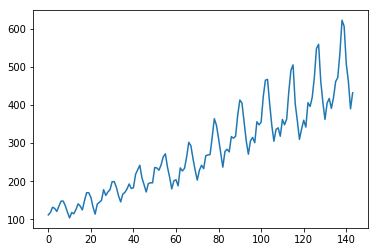

In [3]:
plt.plot(dataset)

In [4]:
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [12]:
train_size = int(len(dataset) * 0.75)
test_size = len(dataset) - train_size
train = dataset[:train_size,:]
test = dataset[train_size:142,:]

def getdata(data,lookback):
    X,Y=[],[]
    for i in range(len(data)-lookback-1):
        X.append(data[i:i+lookback,0])
        Y.append(data[i+lookback,0])
    return np.array(X),np.array(Y).reshape(-1,1)


In [14]:
lookback = 1
X_train,y_train = getdata(train,lookback)
print(lookback)
X_test,y_test = getdata(test,lookback)
print(lookback)
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

1
1


In [15]:
print(lookback)
model=Sequential()
model.add(LSTM(5,input_shape=(1,lookback)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

1
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 5)                 140       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.fit(X_train, y_train, epochs=50, batch_size=1)
y_pred=model.predict(X_test)
y_test=scaler.inverse_transform(y_test)
y_pred=scaler.inverse_transform(y_pred)

Epoch 1/50
106/106 [==============================] - 1s 1ms/step - loss: 0.0949
Epoch 2/50
106/106 [==============================] - 0s 1ms/step - loss: 0.0361
Epoch 3/50
106/106 [==============================] - 0s 1ms/step - loss: 0.0294
Epoch 4/50
106/106 [==============================] - 0s 1ms/step - loss: 0.0251
Epoch 5/50
106/106 [==============================] - 0s 1ms/step - loss: 0.0205
Epoch 6/50
106/106 [==============================] - 0s 1ms/step - loss: 0.0201
Epoch 7/50
106/106 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 8/50
106/106 [==============================] - 0s 1ms/step - loss: 0.0186
Epoch 9/50
106/106 [==============================] - 0s 1ms/step - loss: 0.0129
Epoch 10/50
106/106 [==============================] - 0s 1ms/step - loss: 0.0127
Epoch 11/50
106/106 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 12/50
106/106 [==============================] - 0s 1ms/step - loss: 0.0092
Epoch 13/50
106/106 [====

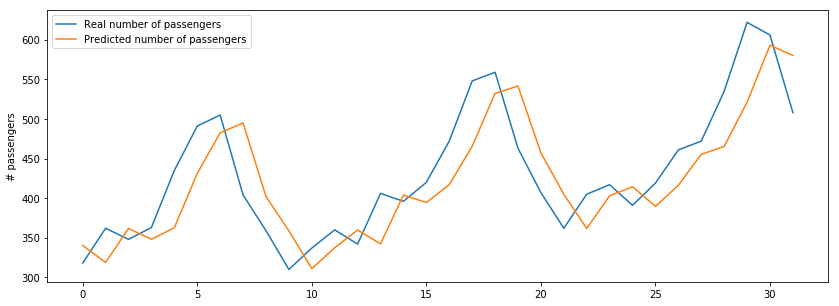

In [9]:
plt.figure(figsize=(14,5))
plt.plot(y_test, label = 'Real number of passengers')
plt.plot(y_pred, label = 'Predicted number of passengers')
plt.ylabel('# passengers')
plt.legend()
plt.show()

In [10]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

2440.4652122692205